In [1]:
%matplotlib inline 
import random
import torch
from d2l import torch as d2l

![](https://cdn.zengchen233.cn/img/202309170925263.PNG)

In [2]:
# %matplotlib inline 可以在Ipython编译器里直接使用，功能是可以内嵌绘图，并且可以省略掉plt.show()这一步。
def synthetic_data(w, b, num_examples):
    '''生成 y=wx+b+噪声'''
    X = torch.normal(0, 1, (num_examples, len(w))) # 均值为0，标准差为1
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [3]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [4]:
print('features:', features[0], '\nlabels:',labels[0])
print(len(features))
print(len(labels))

features: tensor([-0.6150, -2.2974]) 
labels: tensor([10.7872])
1000
1000


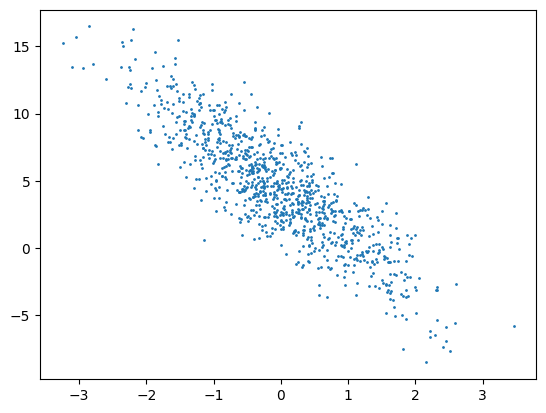

In [5]:
d2l.set_figsize
d2l.plt.scatter(features[:, 1].detach().numpy(),
               labels.detach().numpy(), 1)

In [6]:
def data_iter(batch_size, features, labels): # 该函数接收批量大小，特征矩阵和向量坐标作为输入，生成大小为batch_size的小批量
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_index = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_index], labels[batch_index] # 使用yield的函数是有状态的，返回一个值后，还可以继续调用，直到所有yield都被用完

In [7]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X,'\n',y)
    break

tensor([[ 0.3523,  1.3666],
        [-0.6864, -0.3442],
        [-1.6610, -0.2404],
        [ 0.8846,  0.6332],
        [-0.5617, -0.2399],
        [-1.9018, -0.2738],
        [ 1.5919, -0.2028],
        [ 0.0294,  0.2552],
        [ 1.3052, -0.4297],
        [-0.3588, -1.1261]]) 
 tensor([[0.2403],
        [4.0052],
        [1.6954],
        [3.8130],
        [3.9149],
        [1.3302],
        [8.0747],
        [3.3810],
        [8.2760],
        [7.3097]])


In [8]:
# 定义初始化模型参数
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [9]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

<h3><center>$J(w,b) = \frac{1}{2m} \sum_{i=1}^{m}（\hat{y}-y）^{2}$</center></h3>

In [10]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [11]:
def sgd(params, lr, batch_size):
    '''小批量随机梯度下降'''
    with torch.no_grad(): # 更新的时候不要参与梯度计算
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [12]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [13]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失, xy只是数据集当中的一个数
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.023871
epoch 2, loss 0.000088
epoch 3, loss 0.000049


In [14]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([-0.0002, -0.0003], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0007], grad_fn=<RsubBackward1>)
